# Measures of shape

`esda.shape` 模块提供文献中使用的统计数据来测量多边形的结构和规则性。 这些测量值从非常简单（例如长宽差）到非常复杂（例如归一化转动惯量）不等。 无论如何，我们将逐步计算密西西比州各县的一些度量值。


为什么是密西西比州？ 因为密西西比州西侧的县与密西西比河相连，河道蜿蜒曲折。 一般来说，我们会认为该州左侧的县比右侧面积更大的县更“不规则”。 您可以在下面的地图中看到这一点：

In [17]:
import geopandas, libpysal
from esda import shape as shapestats
import matplotlib.pyplot as plt
import pygeos

import warnings
warnings.filterwarnings("ignore")

In [18]:
counties = geopandas.read_file(libpysal.examples.get_path("south.shp"))
ms_counties = counties.query("STATE_NAME == 'Mississippi'")

Text(0.5, 1.0, 'Mississippi Counties')

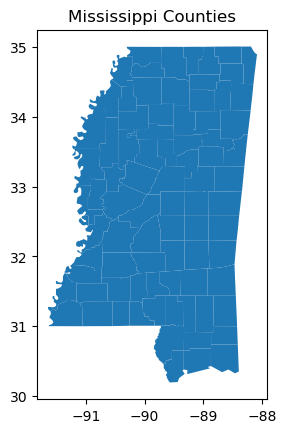

In [19]:
ms_counties.plot()
plt.title("Mississippi Counties")

第一个非常简单的测量是形状的长度和宽度之间的差异。 该测量是*伸长率*的测量。 您可以看到下面的效果，其中相对正方形的县被涂成深蓝色，而拉长的矩形县则被涂成浅黄色。 由于该措施没有“看到”河流的曲折，因此河流县被判断为相对方形且不拉长。

Text(0.5, 1.0, 'length-width difference')

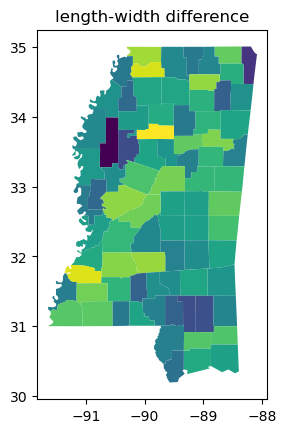

In [20]:
ms_counties.plot(shapestats.length_width_diff(ms_counties.geometry))
plt.title("length-width difference")

# Ideal Shape Measures

下一类形状测量通常被视为“理想形状”紧凑度测量。 这意味着它们构建多边形的一个（或多个）方面（例如其周长或面积）之间的关系，并将其与“理想”形状的类似值进行比较。

理想的形状有几种口味。
-“相对理想形状”是其属性相对于原始形状是固定的形状。 例如，“isoperimetric_quotient”将多边形的面积与与原始多边形周长相同的圆的面积进行比较。 从数学上讲，这些度量通常被构建为使得它们在零和一之间变化，并且当形状与其相对理想形状相同时为一。 该系列中的度量包括“isoperimetric_quotient”和“isoareal_quotient”，以及我们对“fractal_dimension”的实现，稍后将讨论。
-“绝对理想形状”是与原始形状具有某种固定的已知关系的形状，并以某种方式充当该形状的“界限”。 例如，“凸包比率”将多边形的面积与其凸包的面积进行比较。 由于保证凸包至少与原始形状一样大，因此该度量也介于零和一之间，其中 1 意味着多边形是其自己的凸包。 该系列中的度量包括“boundary_amplitude”、“convex_hull_ratio”、“radii_ratio”、“diameter_ratio”和“minimum_bounding_circle_ratio”。

### Absolute Ideal Shape Measures

“boundary_amplitude”和“convex_hull_ratio”是两个简单且密切相关的形状规律性度量。 边界振幅是凸包的周长除以原始形状的周长。 它在零和一之间变化，其中一表示多边形是其自己的凸包的情况。 这是因为凸包总是*至多*原始形状的周长； 当形状有许多凹入形状的凹部时，它会比原始形状短。

在下面的地图中，您可以看到密西西比河沿岸的县的“boundary_amplitude”分数非常差，因为它们的边界非常不稳定：

Text(0.5, 1.0, 'boundary amplitude')

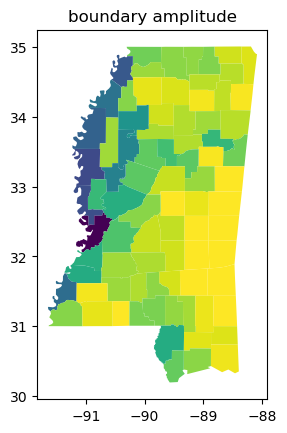

In [21]:
ms_counties.plot(shapestats.boundary_amplitude(ms_counties.geometry))
plt.title("boundary amplitude")

相关地，凸包比率是原始形状的*面积*除以凸包面积。 这又在零和一之间变化：由于凸包总是“包含”原始形状，因此它的面积总是更大。 因此，该度量与“boundary_amplitude”相关，但对于不同的多边形来说会有所不同，因为它属于*面积*，而不是*周长*。 一般来说，基于周长的度量比基于面积的度量对非凸性更敏感。

Text(0.5, 1.0, 'convex hull areal ratio')

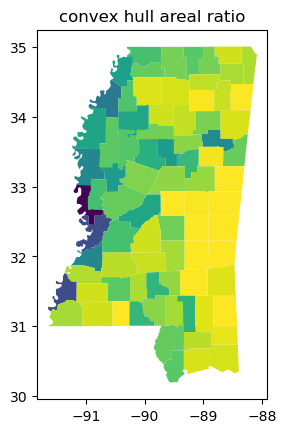

In [22]:
ms_counties.plot(shapestats.convex_hull_ratio(ms_counties.geometry))
plt.title("convex hull areal ratio")

另一个有用的衡量标准是“最小边界圆比”，有时被称为 Reock 衡量标准，以第一篇期刊文章的作者的名字命名，该文章用于分析国会选区。 该比率将原始形状的面积与可以完全包围该形状的最小圆的面积进行比较。 该措施严重损害了伸长率，因为最小边界圆必须变得越来越大才能包含形状。 它也在零和一之间变化，其中一反映多边形是其自身边界圆的情况。

Text(0.5, 1.0, 'minimum bounding circle ratio')

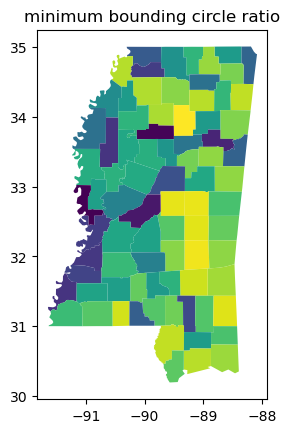

In [23]:
ms_counties.plot(shapestats.minimum_bounding_circle_ratio(ms_counties))
plt.title("minimum bounding circle ratio")

一个相关的度量是“radii_ratio”。 “radii_ratio”实际上将参考形状和理想形状概念混合在一起，而不是比较两个形状的面积。 它将最小边界圆的半径与*等面积*圆（或包含与原始形状相同面积的圆）的半径联系起来。 

Text(0.5, 1.0, 'radii ratio')

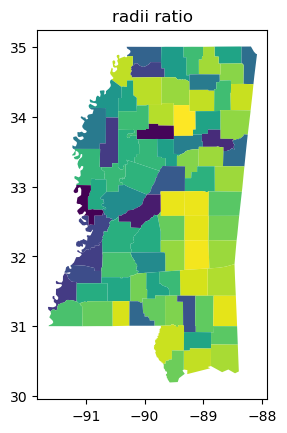

In [24]:
ms_counties.plot(shapestats.radii_ratio(ms_counties.geometry))
plt.title("radii ratio")

此测量的效果通常与“最小边界圆比”大致相同，但对形状中的凹面更加敏感。

Text(0, 0.5, 'Minimum Bounding Circle Ratio')

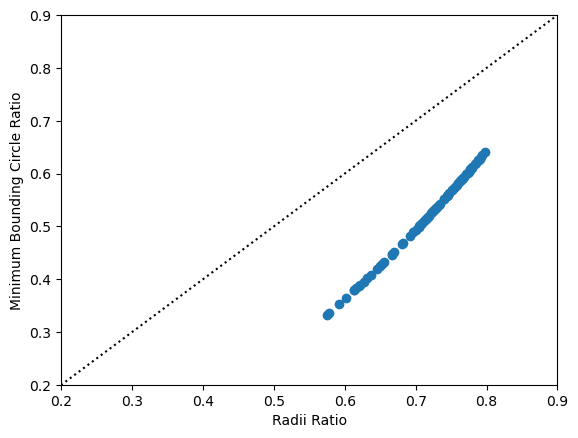

In [25]:
plt.scatter(shapestats.radii_ratio(ms_counties.geometry), 
            shapestats.minimum_bounding_circle_ratio(ms_counties.geometry))
plt.plot((0,1),(0,1), color='k', linestyle=':')
plt.xlim(.2, .9)
plt.ylim(.2, .9)
plt.xlabel("Radii Ratio")
plt.ylabel("Minimum Bounding Circle Ratio")

与最小边界圆比类似的度量是直径比。 这测量了形状的“最长”和“最短”直径之间的比率。 这可以测量为形状的最小旋转矩形的最长和最短轴。 或者，可以使用形状的原始边界框，但这偏向于东西向和南北向的形状。 这又是一个相当强的伸长率衡量标准，最长轴和最短轴之间差异很大的形状得分较低。

<Axes: >

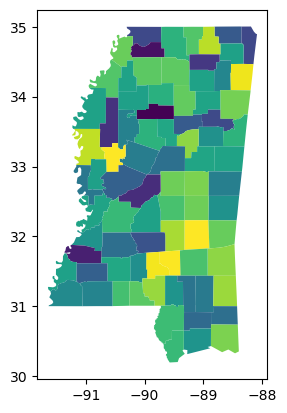

In [26]:
ms_counties.plot(shapestats.diameter_ratio(ms_counties.geometry))

### Relative ideal shape measures

这些类型的形状测量构建了观察到的形状和具有某种已知关系的不同形状之间的关系。 正如我们之前讨论的“radii_ratio”度量，它通常看起来像一个与源形状具有相同周长或面积的圆。

在“isoareal_quotient”的情况下，这将形状的周长与面积与源形状相同的圆的周长相关联：

<Axes: >

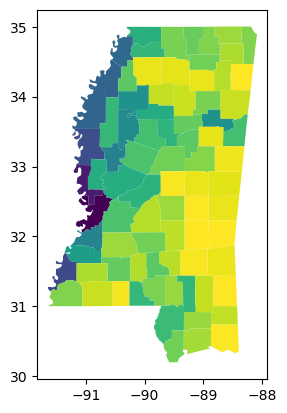

In [27]:
ms_counties.plot(shapestats.isoareal_quotient(ms_counties))

相关的度量“等周商”将形状的面积与与原始形状具有相同周长的圆的面积联系起来。 

<Axes: >

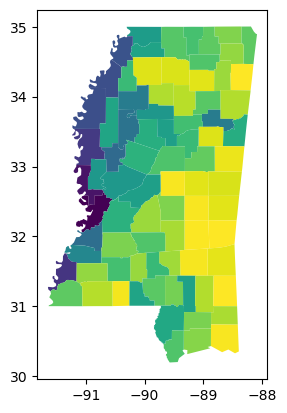

In [28]:
ms_counties.plot(shapestats.isoperimetric_quotient(ms_counties))

这两项指标彼此直接相关，尽管是非线性的

Text(0, 0.5, 'Isoperimetric Quotient')

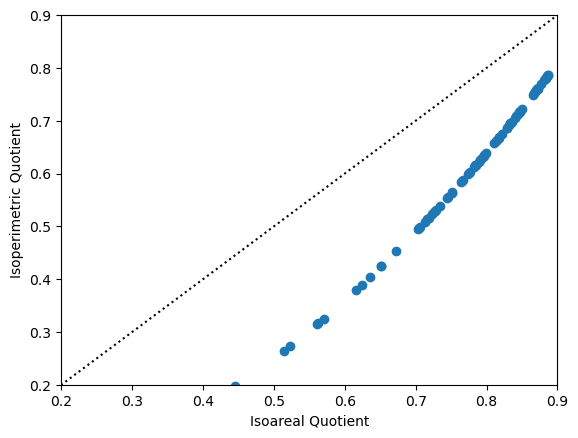

In [29]:
plt.scatter(shapestats.isoareal_quotient(ms_counties), 
            shapestats.isoperimetric_quotient(ms_counties))
plt.plot((0,1),(0,1), color='k', linestyle=':')
plt.xlim(.2, .9)
plt.ylim(.2, .9)
plt.xlabel("Isoareal Quotient")
plt.ylabel("Isoperimetric Quotient")

最后一个相关度量是形状的分形维数。 它测量形状边界的有效尺寸，通常在零和二之间变化，其中二表示非常复杂的边界，零表示非常简单的边界。 然而，我们的特定实现通过假设形状的边界沿着网格或六角形晶格移动来近似真实的分形维数。 因此，该度量实际上是正方形（或六边形）与现有形状之间的关系。 

<Axes: >

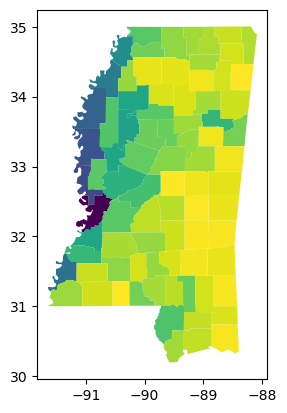

In [30]:
ms_counties.plot(shapestats.fractal_dimension(ms_counties, support='hex'))

<Axes: >

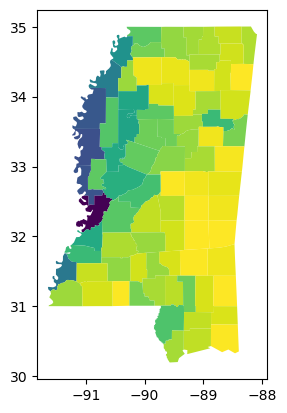

In [31]:
ms_counties.plot(shapestats.fractal_dimension(ms_counties, support='square'))

两者也极其相关：

Text(0, 0.5, 'Fractal Dimension (square)')

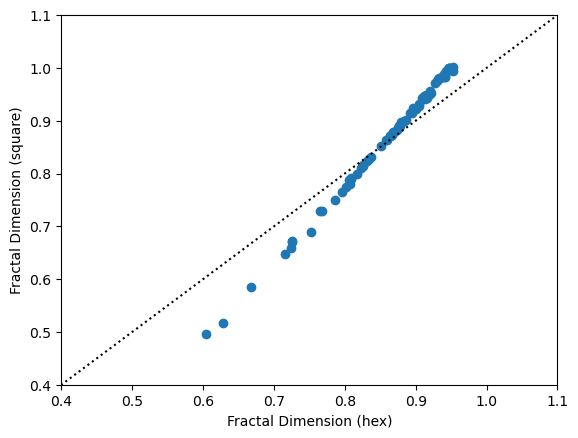

In [32]:
plt.scatter(shapestats.fractal_dimension(ms_counties, support='hex'), 
            shapestats.fractal_dimension(ms_counties, support='square'))
plt.plot((0,2),(0,2), color='k', linestyle=':')
plt.xlim(.4, 1.1)
plt.ylim(.4, 1.1)
plt.xlabel("Fractal Dimension (hex)")
plt.ylabel("Fractal Dimension (square)")

# Conclusion

“esda.shape”模块中还有更多形状测量值，可用于多种应用。 这里详细介绍的内容是有关重新分区的文献中最常见的内容，这并不是形状测量有用的特殊区域。 有关形状测量的更多信息，一篇很好的介绍性概念论文是  [by Shlomo Angel et al. (2010)](https://doi.org/10.1111/j.1541-0064.2009.00304.x)关于如何在地理中测量形状。